In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb

In [2]:
data = pd.read_csv('train_lab3.csv')
test = pd.read_csv('test_data.csv')
data.head()

,Unnamed: 0,soldierId,shipId,attackId,assists,greekFireItems,healthLost,knockedOutSoldiers,throatSlits,healingPotionsUsed,...,numSaves,horseRideDistance,horseRideKills,swimmingDistance,friendlyKills,castleTowerDestroys,onFootDistance,weaponsUsed,respectEarned,bestSoldierPerc
0,0,37923.0,1227634.0,37923.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19.28,0.0,1500.0,4
1,1,102199.0,1055335.0,34008.0,0.0,0.0,2.397,0.0,0.0,2.0,...,0.0,5361.0,0.0,0.0,0.0,0.0,1454.00,7.0,1534.0,2
2,2,79478.0,58240.0,11286.0,0.0,0.0,100.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1356.00,7.0,1464.0,2
3,3,93908.0,691063.0,25716.0,1.0,0.0,199.800,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,528.60,3.0,1503.0,3
4,4,23653.0,601253.0,23653.0,0.0,0.0,156.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1429.00,4.0,1451.0,3


In [3]:
corr = data.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]
selected_columns = selected_columns[0:-1]
test = test[selected_columns]

In [4]:
X = data.drop(['bestSoldierPerc'],axis = 1)
y = data['bestSoldierPerc']

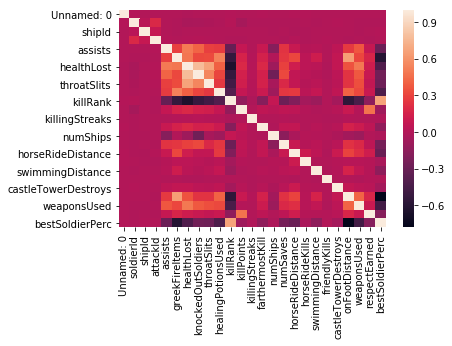

In [5]:
plt.figure()
sns.heatmap(data.corr())

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X,y)

array([[0.00000000e+00, 2.69100845e-01, 4.54578343e-01, ...,
        1.86821705e-03, 0.00000000e+00, 7.37921906e-01],
       [1.42859184e-05, 7.25250160e-01, 3.90777958e-01, ...,
        1.40891473e-01, 1.25000000e-01, 7.60423561e-01],
       [2.85718367e-05, 5.64005394e-01, 2.15648774e-02, ...,
        1.31395349e-01, 1.25000000e-01, 7.14096625e-01],
       ...,
       [9.99971428e-01, 7.95628415e-01, 5.52580080e-01, ...,
        5.23643411e-03, 3.57142857e-02, 7.37921906e-01],
       [9.99985714e-01, 1.17692144e-01, 1.07905850e-01, ...,
        2.50000000e-01, 1.25000000e-01, 7.37921906e-01],
       [1.00000000e+00, 5.83145270e-01, 6.59850885e-02, ...,
        1.42538760e-02, 1.78571429e-02, 7.36598279e-01]])

In [11]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.1,
                max_depth = 10, n_estimators = 300, random_state = 0)
xg_reg.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [12]:
y_pred = xg_reg.predict(test)

In [13]:
df_soln = pd.DataFrame(data = [test['soldierId'], y_pred], index = None)
df = df_soln.transpose()
df['soldierId'] = df['soldierId'].astype(float)
df.columns = ['soldierId','bestSoldierPerc']
df['bestSoldierPerc'] = df['bestSoldierPerc'].astype(int)
df.to_csv('soln xgboost_2.csv',index = False)